In [1]:
from collections import namedtuple

1. download url
2. download folder (compressed file)
3. extract folder (extracted file)
4. train dataset folder
5. test dataset folder

In [3]:
dataingestionconfig = namedtuple("dataingestionconfig",
["dataset_download_url","tgz_download_dir","raw_data_dir","ingested_train_dir","ingested_test_dir"])

In [1]:
import yaml

In [2]:
import os

In [3]:
os.getcwd()

'd:\\ml\\New folder\\machine_learning_project\\notebook'

In [4]:
os.chdir("d:\\ml\\New folder\\machine_learning_project")

In [5]:
os.getcwd()

'd:\\ml\\New folder\\machine_learning_project'

In [6]:
os.listdir()

['.dockerignore',
 '.git',
 '.github',
 '.gitignore',
 'app.py',
 'config',
 'Dockerfile',
 'housing',
 'housing_logs',
 'housing_predictor.egg-info',
 'LICENSE',
 'notebook',
 'README.md',
 'requirements.txt',
 'setup.py',
 'venv']

In [7]:
os.listdir("config")

['config.yaml']

In [8]:
config_file_path = os.path.join("config","config.yaml")

In [9]:
config_file_path

'config\\config.yaml'

In [10]:
os.path.exists(config_file_path)

True

In [11]:
config_info = None
with open(config_file_path, "rb") as yaml_file:
    config_info=yaml.safe_load(yaml_file)

In [12]:
config_info

{'training_pipeline_config': {'pipeline_name': 'housing',
  'artifact_dir': 'artifact'},
 'data_ingestion_config': {'dataset_download_url': 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz',
  'raw_data_dir': 'raw_data',
  'tgz_download_dir': 'tgz_data',
  'ingested_dir': 'ingested_data',
  'ingested_train_dir': 'train',
  'ingested_test_dir': 'test'},
 'data_validation_config': {'schema_dir': 'config',
  'schema_file_name': 'schema.yaml',
  'report_file_name': 'report.json',
  'report_page_file_name': 'report.html'},
 'data_transformation_config': {'add_bedroom_per_room': True,
  'transformed_dir': 'transformed_data',
  'transformed_train_dir': 'train',
  'transformed_test_dir': 'test',
  'preprocessing_dir': 'preprocessed',
  'preprocessed_object_file_name': 'preprocessed.pkl'},
 'model_trainer_config': {'trained_model_dir': 'trained_model',
  'model_file_name': 'model.pkl',
  'base_accuracy': 0.6,
  'model_config_dir': 'config',
  'model_confi

In [13]:
config_info["data_ingestion_config"]

{'dataset_download_url': 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz',
 'raw_data_dir': 'raw_data',
 'tgz_download_dir': 'tgz_data',
 'ingested_dir': 'ingested_data',
 'ingested_train_dir': 'train',
 'ingested_test_dir': 'test'}

In [14]:
def read_yaml_file(file_path:str) ->dict :
    try :
        with open(file_path, "rb") as yaml_file:
            return yaml.safe_load(yaml_file)
    except Exception as e:
        raise e

In [17]:
read_yaml_file(config_file_path)

{'training_pipeline_config': {'pipeline_name': 'housing',
  'artifact_dir': 'artifact'},
 'data_ingestion_config': {'dataset_download_url': 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz',
  'raw_data_dir': 'raw_data',
  'tgz_download_dir': 'tgz_data',
  'ingested_dir': 'ingested_data',
  'ingested_train_dir': 'train',
  'ingested_test_dir': 'test'},
 'data_validation_config': {'schema_dir': 'config',
  'schema_file_name': 'schema.yaml',
  'report_file_name': 'report.json',
  'report_page_file_name': 'report.html'},
 'data_transformation_config': {'add_bedroom_per_room': True,
  'transformed_dir': 'transformed_data',
  'transformed_train_dir': 'train',
  'transformed_test_dir': 'test',
  'preprocessing_dir': 'preprocessed',
  'preprocessed_object_file_name': 'preprocessed.pkl'},
 'model_trainer_config': {'trained_model_dir': 'trained_model',
  'model_file_name': 'model.pkl',
  'base_accuracy': 0.6,
  'model_config_dir': 'config',
  'model_confi

In [251]:
import pandas as pd

In [252]:
import matplotlib.pyplot as plt
import numpy as np

In [253]:
csv_file_path = r"D:\ml\New folder\machine_learning_project\housing\artifact\data_ingestion\2022-07-29-16-30-10\raw_data\housing.csv"
housing = pd.read_csv(csv_file_path)

<AxesSubplot:ylabel='Frequency'>

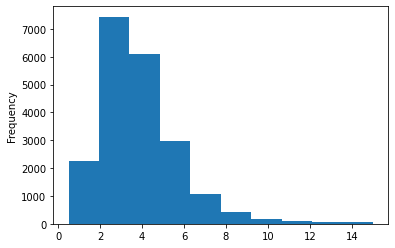

In [13]:
housing["median_income"].plot(kind="hist")

In [254]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
    labels=[1,2,3,4,5]
)

In [255]:
housing.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

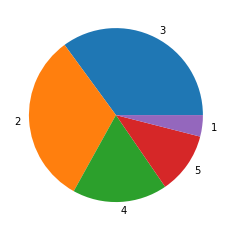

In [256]:
plt.pie(housing.income_cat.value_counts(), labels=housing.income_cat.value_counts().index);

In [257]:
from sklearn.model_selection import StratifiedShuffleSplit

In [258]:
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)

In [259]:
for train_ix, test_ix in split.split(housing, housing["income_cat"]):
    print(train_ix, test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [260]:
train_df = housing.loc[train_ix]
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [261]:
test_df = housing.loc[test_ix]
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [41]:
housing.shape

(20640, 11)

In [42]:
train_df.shape

(16512, 11)

In [43]:
test_df.shape

(4128, 11)

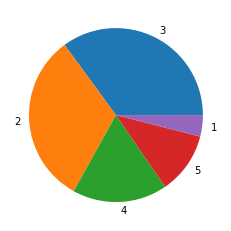

In [47]:
plt.pie(train_df.income_cat.value_counts(), labels= train_df.income_cat.value_counts().index);

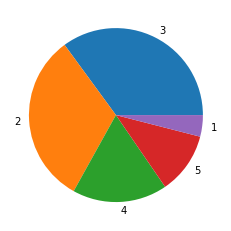

In [48]:
plt.pie(test_df.income_cat.value_counts(), labels= test_df.income_cat.value_counts().index);

In [1]:
lst =['a','b','c','a','c','d','b','c','f']
output = ['a2','b2','c3','d1','f1']

In [250]:
d = {}
for i in lst:
    d[i] = 0
    keys = list(d.keys())  
for i in lst:
    for j in keys:
        if i == j:
            d[i] +=1
        else:
            d[i]
for i in keys:
    print(i,d[i])
            
    

a 2
b 2
c 3
d 1
f 1


In [247]:
d

{'a': 2, 'b': 2, 'c': 3, 'd': 1, 'f': 1}

a 2
b 2
c 3
d 1
f 1


In [267]:
housing.dtypes.index, housing.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [268]:
housing.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
      dtype=object)

In [274]:
data_type = list(map(lambda x: str(x).replace("dtype('", "").replace("')",""),housing.dtypes.values))

In [275]:
data_type

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [276]:
column_name = housing.columns

In [277]:
dict(zip(column_name, data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}

In [288]:
dd = lambda x:x+1
dd(5)

6

In [1]:
from housing.component import data_validation

In [3]:
data = data_validation

In [15]:
data

<module 'housing.component.data_validation' from 'd:\\ml\\new folder\\machine_learning_project\\housing\\component\\data_validation.py'>

In [14]:
import pandas as pd
import numpy as np
import os
import yaml

In [10]:
df = pd.read_csv("D:\\ml\\New folder\\machine_learning_project\housing\\artifact\\data_ingestion\\2022-08-10-17-06-01\\ingested_data\\train\\housing.csv")

In [45]:
len(df.columns)

10

In [19]:
with open("D:\\ml\\New folder\\machine_learning_project\\config\\schema.yamal","r") as file:
    schema = yaml.safe_load(file)

In [44]:
len(schema["columns"].keys())

10

In [46]:
from housing.util.util import read_yaml_file

In [48]:
schema = read_yaml_file("D:\\ml\\New folder\\machine_learning_project\\config\\schema.yamal")

In [49]:
schema

{'columns': {'longitude': 'float',
  'latitude': 'float',
  'housing_median_age': 'float',
  'total_rooms': 'float',
  'total_bedrooms': 'float',
  'population': 'float',
  'households': 'float',
  'median_income': 'float',
  'median_house_value': 'float',
  'ocean_proximity': 'category'},
 'numerical_columns': ['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 'categorical_columns': ['ocean_proximity'],
 'target_column': 'median_house_value',
 'domain_value': {'ocean_proximity': ['<1H OCEAN',
   'INLAND',
   'ISLAND',
   'NEAR BAY',
   'NEAR OCEAN']}}

In [50]:
len(df.columns) == len(schema["columns"].keys())

True

In [60]:
df.columns == list(schema['columns'].keys())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [59]:
list(schema['columns'].keys())

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [99]:
values = list(schema['domain_value'].values())[0]

In [108]:
df_values = list(df['ocean_proximity'].unique())

In [96]:
list(schema['domain_value'].values())[0] == df['ocean_proximity'].unique()

array([False, False, False,  True, False])

In [113]:
for i in values:
    print(i)

<1H OCEAN
INLAND
ISLAND
NEAR BAY
NEAR OCEAN


In [112]:
for i in df_values:
    print(i)

INLAND
NEAR OCEAN
<1H OCEAN
NEAR BAY
ISLAND


In [114]:
for i in df_values:
    if i in values:
        print("yes", i)

yes INLAND
yes NEAR OCEAN
yes <1H OCEAN
yes NEAR BAY
yes ISLAND


In [140]:
from housing.constant import SCHEMA_FILE_PATH

ImportError: cannot import name 'SCHEMA_FILE_PATH' from 'housing.constant' (d:\ml\new folder\machine_learning_project\housing\constant\__init__.py)

In [141]:
'D:\\ml\\New folder\\machine_learning_project\\config\\schema.yamal'

'D:\\ml\\New folder\\machine_learning_project\\config\\schema.yamal'

In [5]:
import os
os.chdir(os.pardir)

In [6]:
config_file_path= os.path.join(os.getcwd(),"config","config.yaml")

In [7]:
from housing.pipeline.pipeline import Pipeline

In [8]:
from housing.config.configuration import configuration

In [9]:
config = configuration(config_file_path=config_file_path)

HousingException: Error occured in script: [d:\ml\New folder\machine_learning_project\housing\config\configuration.py] at line number: [19] error message: [Error occured in script: [d:\ml\New folder\machine_learning_project\housing\util\util.py] at line number: [30] error message: [[Errno 2] No such file or directory: 'd:\\ml\\New folder\\config\\config.yaml']]

In [26]:
config.get_training_pipeline_config()

TypeError: 'trainingPiplineconfig' object is not callable

In [25]:
config.get_data_validation_config()

datavalidationconfig(schema_file_path='d:\\ml\\New folder\\machine_learning_project\\config\\schema.yaml', report_file_path='d:\\ml\\New folder\\machine_learning_project\\housing\\artifact\\data_validation\\2022-08-26-23-35-26\\report.json', report_page_file_path='d:\\ml\\New folder\\machine_learning_project\\housing\\artifact\\data_validation\\2022-08-26-23-35-26\\report.html')